In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, END, START
from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [4]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am vibhav and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user is Vibhav and mentions liking to play cricket. Let me think about how to respond. First, I should greet him and acknowledge his interest. Maybe ask what position he plays. That shows I'm listening and invites more details. Also, cricket has different formats like T20, Test, so asking about preferred format could be good. Need to keep it friendly and open-ended. Let me make sure the response is positive and encourages further conversation. Maybe add a question about favorite teams or players too? Wait, the user might not mention that yet, so maybe stick to the basics first. Yeah, start with position and format. Keep it natural and conversational.\n</think>\n\nHey Vibhav, that's awesome! Cricket is such a thrilling sport. Do you have a favorite position to play, like batsman, bowler, or fielder? Also, do you prefer the fast-paced T20 games or the longer Test matches? Let me know—I’d love to chat more about the game! 🏏", additional_kwargs={}, r

In [5]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

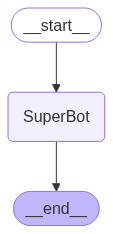

In [6]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is vibhav And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is vibhav And I like cricket', additional_kwargs={}, response_metadata={}, id='3cf1a5ca-fa0a-45f7-bd65-76c99ad2239a'),
  AIMessage(content="\n<think>\nOkay, the user introduced himself as Vibhav and mentioned he likes cricket. I should respond warmly and engage him further. Let me start by greeting him and acknowledging his interest in cricket. Maybe ask about his favorite team or players to keep the conversation going. I should keep it friendly and open-ended so he feels comfortable sharing more. Let me make sure the tone is positive and enthusiastic.\n</think>\n\nHello Vibhav! Nice to meet you. Cricket is a fantastic sport—I'm glad you enjoy it too! Do you have a favorite team or player? And have you been following any recent matches or tournaments? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 22, 'total_tokens': 148, 'completion_time': 0.306964086, 'prompt_time': 0.003326278, 'q

In [8]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is vibhav And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vibhav and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest. Maybe ask if they follow any particular teams or players. That should keep the conversation going. Also, I should keep it casual and open-ended so they feel comfortable sharing more. Let me check for any typos and make sure the tone is positive. Alright, that should work.\n</think>\n\nHi Vibhav! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular teams or players? And have you been enjoying the recent matches or tournaments? Let me know—I’m happy to chat about cricket too! ⚔️🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 22, 'total_tokens': 180, 'completion_time': 0.394119518, 'prompt_time': 0.003628469, 'queue_time': 0.2560321299

In [9]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is vibhav And I like cricket', additional_kwargs={}, response_metadata={}, id='0121372a-88b8-4f59-9578-b2d032f85b06'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vibhav and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest. Maybe ask if they follow any particular teams or players. That should keep the conversation going. Also, I should keep it casual and open-ended so they feel comfortable sharing more. Let me check for any typos and make sure the tone is positive. Alright, that should work.\n</think>\n\nHi Vibhav! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular teams or players? And have you been enjoying the recent matches or tournaments? Let me know—I’m happy to chat about cricket too! ⚔️🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tok

In [10]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user mentioned they like football now. Let me check the conversation history. They first said they like cricket, then added football. The assistant responded positively each time.\n\nHmm, the user\'s latest message is just "I also like football" again. Maybe they meant to say more but didn\'t. Or perhaps they\'re emphasizing their interest. The assistant should acknowledge it again but maybe ask more questions to keep the conversation going.\n\nWait, the user might be a non-native English speaker, so maybe they repeated it to confirm. The assistant should respond warmly, show enthusiasm, and prompt for more details. Let\'s see previous responses. The assistant asked about favorite teams or players before. Maybe the user hasn\'t answered that yet. \n\nI should encourage them to share specifics about either sport. Maybe mention different aspects like favorite leagues, memorable moments, or reasons they enjoy both sports. 

In [11]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is vibhav And I like cricket', additional_kwargs={}, response_metadata={}, id='0121372a-88b8-4f59-9578-b2d032f85b06'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vibhav and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest. Maybe ask if they follow any particular teams or players. That should keep the conversation going. Also, I should keep it casual and open-ended so they feel comfortable sharing more. Let me check for any typos and make sure the tone is positive. Alright, that should work.\n</think>\n\nHi Vibhav! Nice to meet you. That's a great interest—cricket is such a thrilling sport! Do you follow any particular teams or players? And have you been enjoying the recent matches or tournaments? Let me know—I’m happy to chat about cricket too! ⚔️🏏", additional_kwargs={}, response_metadata={'token_usage': {'completion_tok

In [12]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is vibhav and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is vibhav and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '19b7ee63-d763-44b6-ba04-3c81719e5125', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is vibhav And I like cricket', additional_kwargs={}, response_metadata={}, id='0121372a-88b8-4f59-9578-b2d032f85b06'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Vibhav and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name and interest. Maybe ask if they follow any particular teams or players. That should keep the conversation going. Also, I should keep it casual and open-ended so they feel comfortable sharing more. Let me check for any typos and make sure the tone is positive. Alright, that should work.\n</think>\n\nHi Vibhav! Nice to meet you. Th